<a href="https://colab.research.google.com/github/PsorTheDoctor/robotics/blob/main/notebooks/bunny_icp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ClayFlannigan/icp.git
%cd icp/

Cloning into 'icp'...
remote: Enumerating objects: 52, done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (52/52), done.
/content/icp/animation/icp


In [ ]:
!pip install trimesh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import random
from math import *
import trimesh
import os

import icp
import test

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving bunny.stl to bunny.stl


In [ ]:
mesh = trimesh.load_mesh('bunny.stl')
mesh.show()

In [ ]:
density = 3000
dim = 3
translation = 0.5
rotation = 0.5

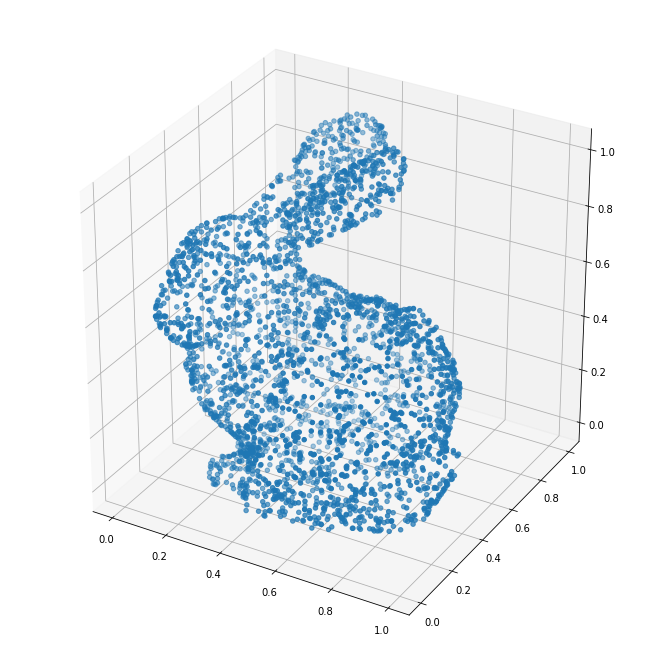

In [ ]:
A = mesh.sample(density)

scaler = MinMaxScaler(feature_range=(0, 1))
A = scaler.fit_transform(A)

fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2])
# ax.set_axis_off()
plt.show()

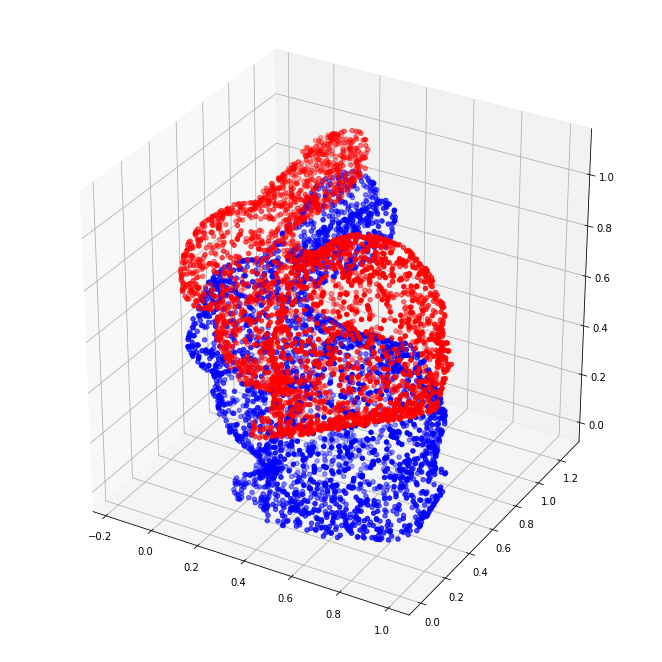

In [ ]:
B = mesh.sample(density)
B = scaler.fit_transform(B)

t = np.random.rand(dim) * translation
B += t

R = test.rotation_matrix(np.random.rand(dim), np.random.rand() * rotation)
B = np.dot(R, B.T).T

fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='b')
ax.scatter(B[:, 0], B[:, 1], B[:, 2], c='r')
# ax.set_axis_off()
plt.show()

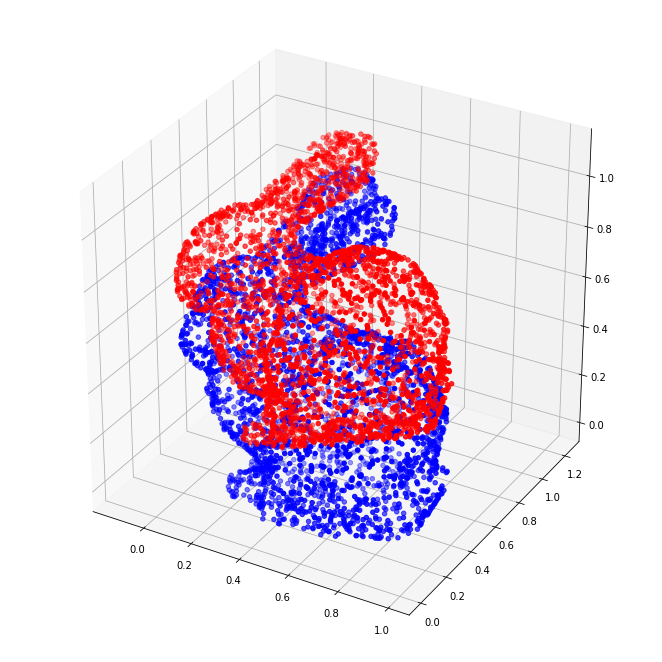

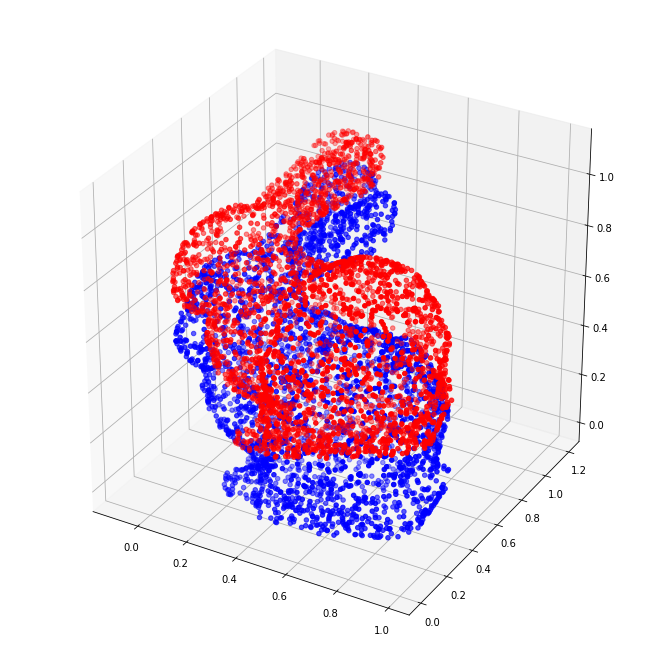

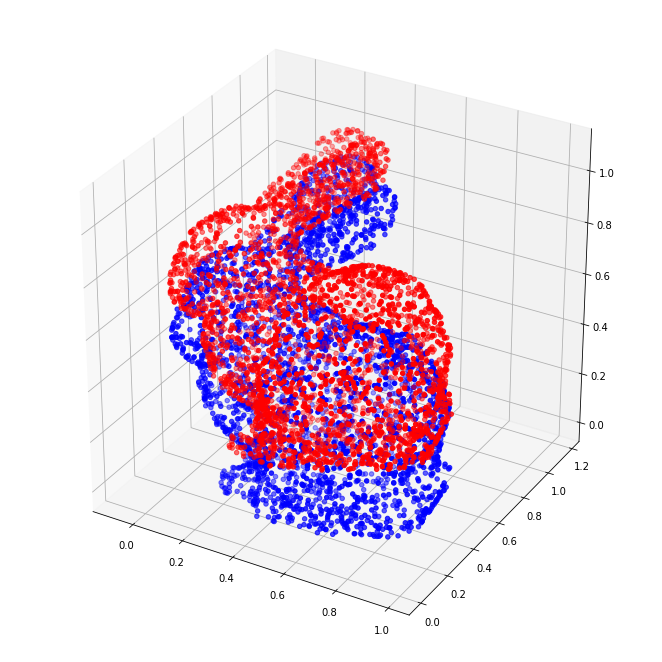

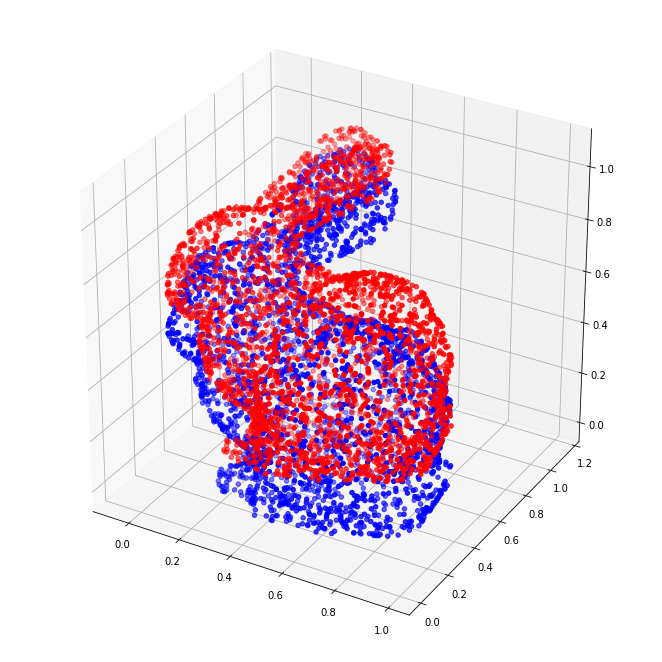

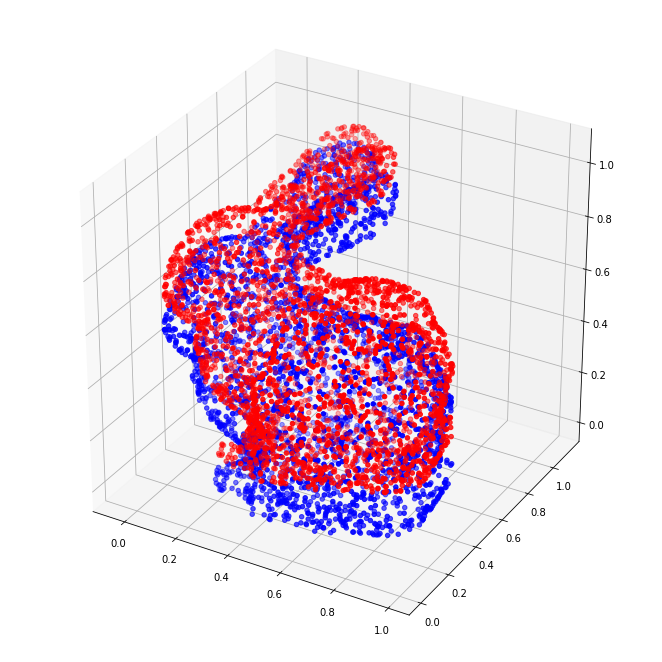

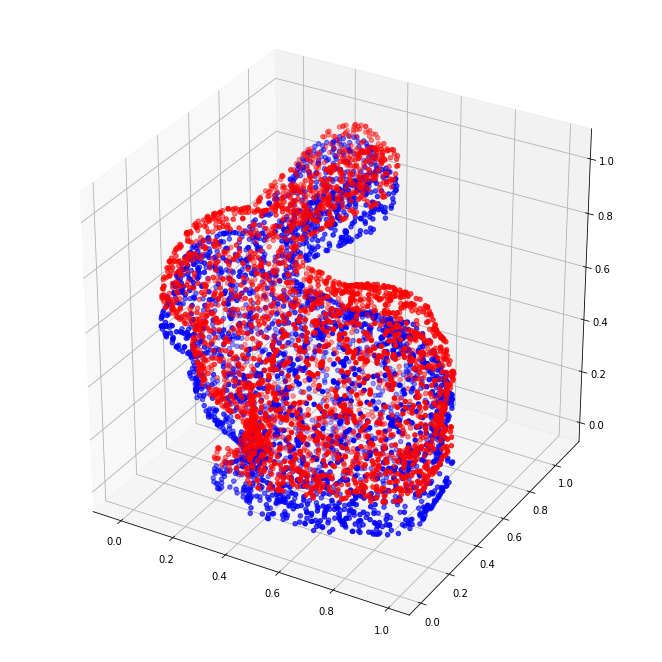

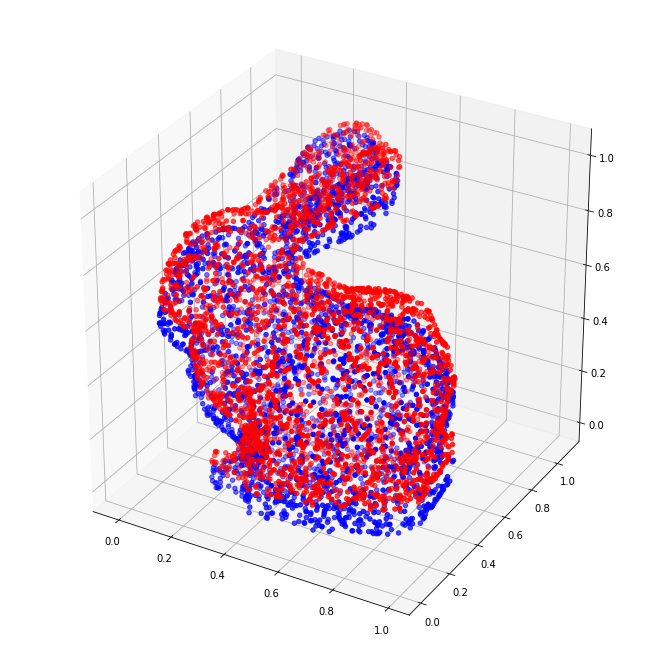

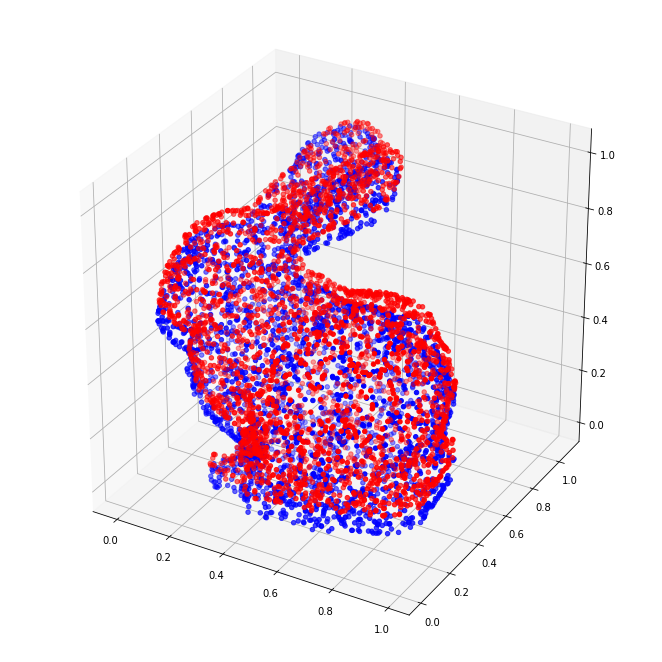

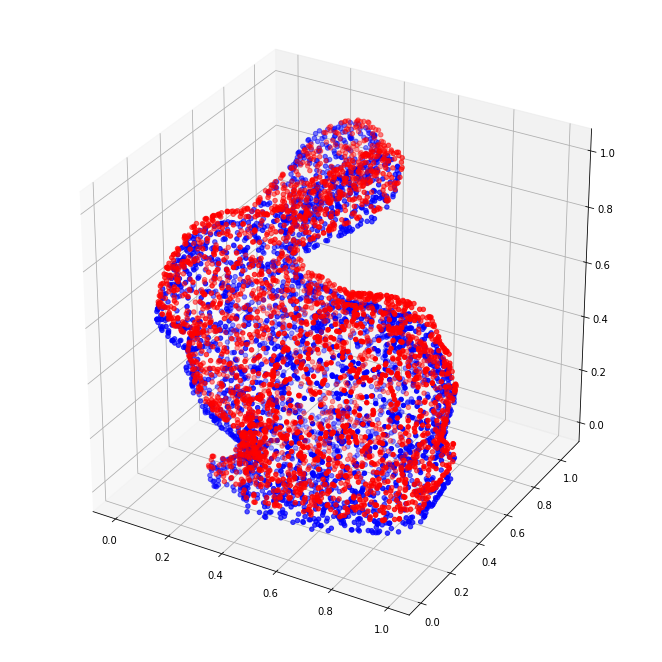

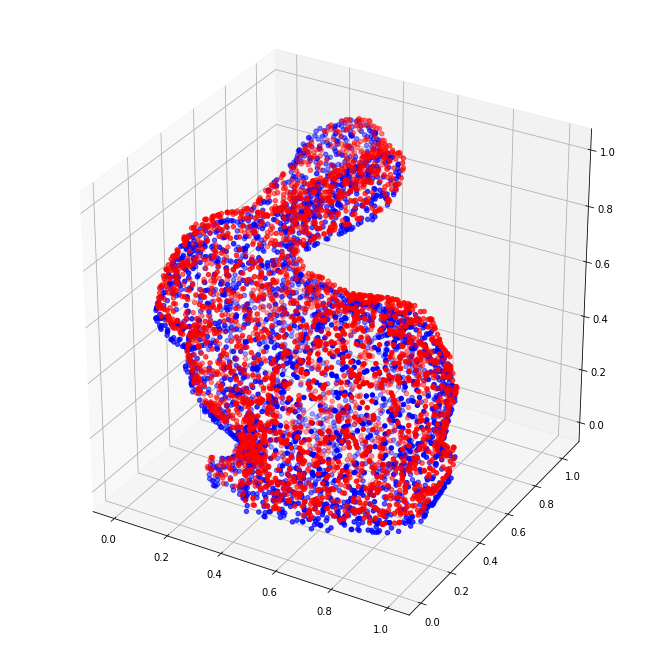

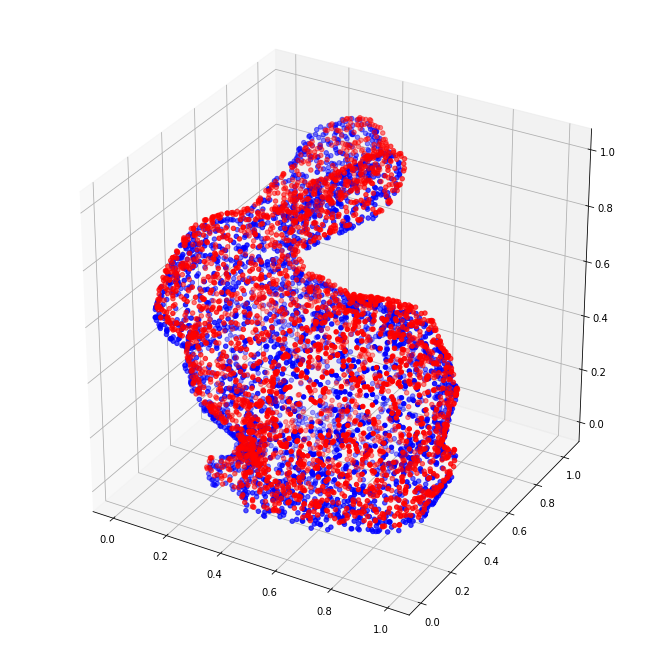

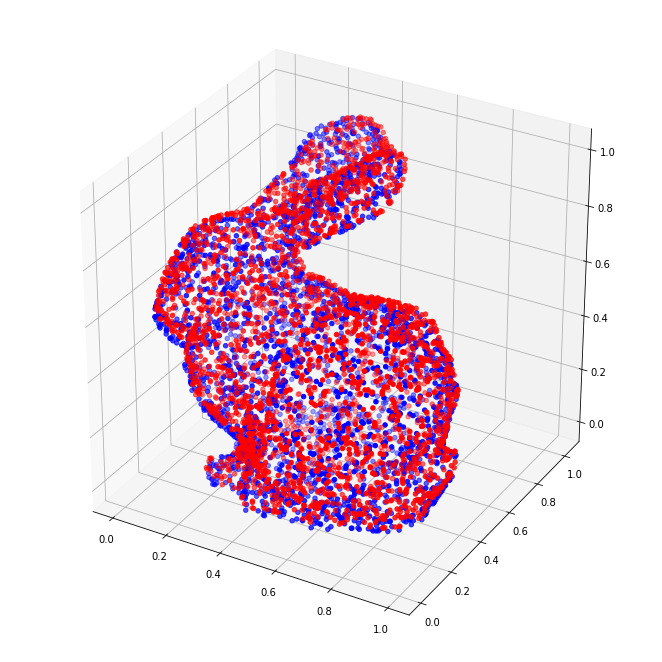

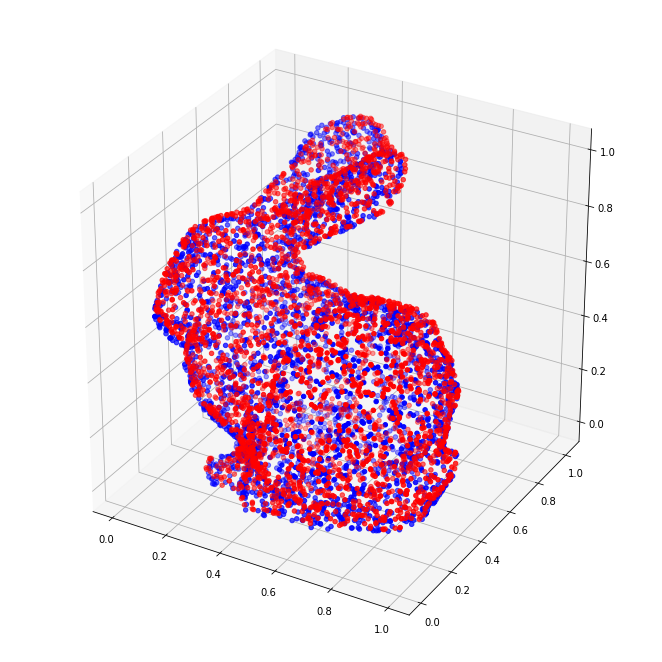

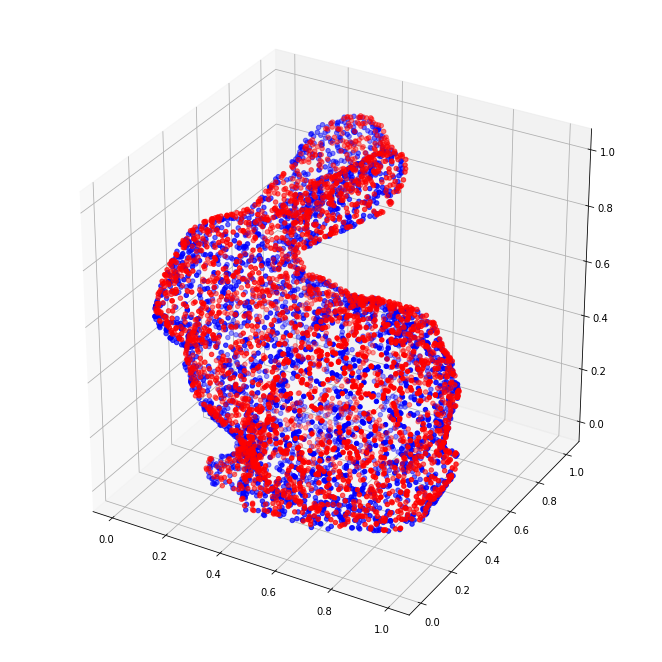

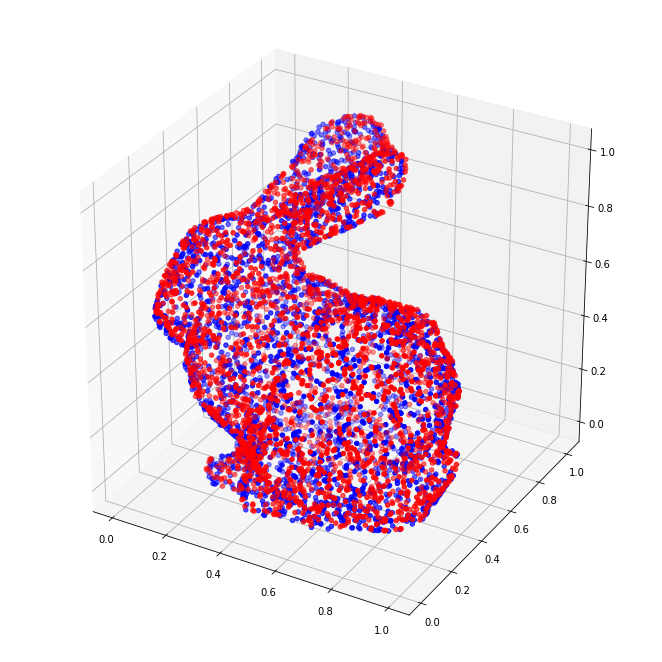

In [125]:
iterations = 15

for i in range(iterations):
  T, distances, iters = icp.icp(B, A, max_iterations=(i+1))

  C = np.ones((density, 4))
  C[:, 0:3] = B
  C = np.dot(T, C.T).T

  fig = plt.figure(figsize=(9, 9))
  ax = Axes3D(fig)
  ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='b')
  ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='r')

  fig.savefig('icp{}.png'.format(i))

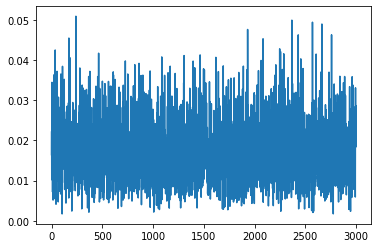

In [121]:
plt.plot(distances)
plt.show()

In [122]:
T

array([[ 0.92756183,  0.03726742,  0.37180665, -0.12246663],
       [ 0.05494297,  0.9705973 , -0.23435477, -0.02895115],
       [-0.36960833,  0.23780671,  0.89824142, -0.14558296],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [123]:
import cv2
import glob

path = '/content/icp/'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter('bunny_icp.mp4', fourcc, 3, (1152, 648))

i = 100
for filename in os.listdir(path):
  full_path = os.path.join(path, filename)

  img = cv2.imread('img{}.png'.format(i))
  writer.write(img)
  i += 1

writer.release()

In [124]:
# files.download('/content/icp/animation/icp/animation/bunny_icp.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>